**Python Programming for Economics and Finance** Pandas

Thomas J. Sargent & John Stachurski

---

# 9. Numpy

## 9.1. Overview

NumPy is a first-rate library for numerical programming

* Widely used in academia, finance and industry.

* Mature, fast, stable and under continuous development.

We have already seen some code involving NumPy in the preceding lectures.

In this lecture, we will start a more systematic discussion of both

* NumPy arrays and

* the fundamental array processing operations provided by NumPy.

## 9.2. NumPy Arrays

The essential problem that NumPy solves is fast array processing.

The most important structure that NumPy defines is an `array data type` formally called a `numpy.ndarray`.

NumPy arrays power a large proportion of the scientific Python ecosystem.

In [1]:
import numpy as np

To create a NumPy array containing only zeros we use np.zeros. 

In [2]:
a = np.zeros(3)
a

array([0., 0., 0.])

In [3]:
type(a)
# type of the array is numpy.ndarray

numpy.ndarray

`NumPy arrays` are somewhat like native `Python lists`, except that

* Data must be `homogeneous` (all elements of the same type).

* These types must be one of the data types (dtypes) provided by NumPy.

The most important of these dtypes are:

* float64: 64 bit floating-point number

* int64: 64 bit integer

* bool: 8 bit True or False

There are also dtypes to represent complex numbers, unsigned integers, etc.

On modern machines, the default dtype for arrays is float64

In [4]:
a = np.zeros(3)
type(a[0])

numpy.float64

If we want to use integers we can specify as follows:

In [5]:
a = np.zeros(3, dtype = int)
type(a[0])

numpy.int32

### Shape and Dimension

In [6]:
z = np.zeros(10)

In [7]:
z

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

The dimension is recorded in the `shape` attribute, which is a tuple.

In [8]:
z.shape

(10,)

Here the shape tuple has only one elements, which is the length o the array.

To give it dimension, we can change the `shape` attribut.

In [9]:
z.shape = (10,1)
z

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [10]:
z.shape = (5,2)
z

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [11]:
z.shape = (3,5)
z
# Here is an error that cannot reshape array of size 10 into shape(3,5)

ValueError: cannot reshape array of size 10 into shape (3,5)

In [12]:
z = np.zeros(4)
z.shape = (2,2)
z

array([[0., 0.],
       [0., 0.]])

In the last case, to make the 2 by 2 array, we could pass a tuple to the `zeros()` function, as in `z = np.zeros((2,2))`

### Creating Arrays

`np.empty()` can create arrays in memory that can later be populated with data. 

In [13]:
z = np.empty(3)
z

array([0., 0., 0.])

The numbers you see here are garbage values.

(Python allocates 3 contiguous 64 bit pieces of memory, and the existing contents of those memory slots are interpreted as `float64` values)

To set up a grid of evenly spaced numbers use `np.linspace`.

In [14]:
z = np.linspace(2,4,5) # From 2 to 4, with 5 elements.
z

array([2. , 2.5, 3. , 3.5, 4. ])

To create an identity matrix use either `np.idnetity` or `np.eye`.

In [15]:
z = np.identity(2)
z

array([[1., 0.],
       [0., 1.]])

In addition, Numpy arryas can be created from Python lists, tuples, etc. using `np.array`. 

In [20]:
z = np.array([10,20]) # ndarray from Python list. 
z

array([10, 20])

In [21]:
type(z)

numpy.ndarray

In [22]:
z = np.array((10,20), dtype = float) # Here 'float' is equivalent to 'np.float64'
z

array([10., 20.])

In [23]:
z = np.array([[1,2],[3,4]]) # 2D array from a list of lists.
z

array([[1, 2],
       [3, 4]])

See also `np.asarray`, which performs a similar function, but does not make a distinct copy of data already in a NumPy array.

In [24]:
na  = np.linspace(10,20,2)
na
na is np.asarray(na) # Does not copy NumPy arrays.

True

In [25]:
na is np.array(na) # Does make a new copy

False

To read in the array data from a text file containing numeric data use `np.loadtxt` or `np.genfromtxt` -- see the documentation for details. 

### Array Indexing 

For a flat array, indexing is the same as Python sequences:

In [26]:
z = np.linspace(1,2,5)
z

array([1.  , 1.25, 1.5 , 1.75, 2.  ])

In [27]:
z[0]

1.0

In [28]:
z[0:2] # Two elements, starting at element 0.

array([1.  , 1.25])

In [29]:
z[-1]

2.0

For 2D arrays the index syntatx is as follows:

In [30]:
z = np.array([[1,2],[3,4]])
z

array([[1, 2],
       [3, 4]])

In [31]:
z[0,0]

1

In [32]:
z[0,1]

2

Columns and rows can be extracte as follows.

In [33]:
z[0,:]

array([1, 2])

In [34]:
z[:,1]

array([2, 4])

NumPy arrays of integers can also be used to extract elements. 

In [35]:
z = np.linspace(2,4,5)
z

array([2. , 2.5, 3. , 3.5, 4. ])

In [36]:
indices = np.array((0,2,3))
z[indices]

array([2. , 3. , 3.5])

Finally, an array of `dtype bool` can be used to extract elements.

In [37]:
z

array([2. , 2.5, 3. , 3.5, 4. ])

In [38]:
d = np.array([0,1,1,0,0], dtype = bool)
d

array([False,  True,  True, False, False])

In [39]:
z[d]

array([2.5, 3. ])

An aside: all elements of an array can be set equal to one number using slice notation.

In [40]:
z = np.empty(3)
z

array([2. , 3. , 3.5])

In [41]:
z[:] = 42
z

array([42., 42., 42.])

### Array Methods

Arrays have useful methods, all of which are carefully optimized. 

In [42]:
a = np.array((4,3,2,1))
a

array([4, 3, 2, 1])

In [43]:
a.sort() # sort a place
a

array([1, 2, 3, 4])

In [44]:
a.sum() # sum 

10

In [45]:
a.mean() # mean

2.5

In [46]:
a.max() # max

4

In [47]:
a.min() # min 

1

In [48]:
a.argmax() # returns the index of the maximal element.

3

In [49]:
a.cumsum() # cumulative sum of the elememts of a 

array([ 1,  3,  6, 10], dtype=int32)

In [50]:
a.cumprod() # cumulative product of the elements of a 

array([ 1,  2,  6, 24], dtype=int32)

In [51]:
a.var() # variance

1.25

In [52]:
a.std() # standard deviation

1.118033988749895

In [53]:
a
a.shape =(2,2)
a.T # equivalent to a.transposse

array([[1, 3],
       [2, 4]])

Another method worth knowing is `searchsorted()`. 

If `z` is a nondecreasing array, then `z.searchsorted(a)` returns the index of the first element of `z` that is `>=a`

In [54]:
z = np.linspace(2,4,5)
z

array([2. , 2.5, 3. , 3.5, 4. ])

In [56]:
z.searchsorted(2.2)

1

In [57]:
z[1]

2.5

Many of the methods discussed above have equivalent functions in the Numpy namespace. 

In [58]:
a = np.array((4,3,2,1))
a

array([4, 3, 2, 1])

In [59]:
a.sum()

10

In [60]:
a.mean()

2.5

## 9.3. Operations on Arrays

### Arithmetic Operations

The operators `+`, `-`, `*`, `/` and `**` all act elementwise on arrays.

In [61]:
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])

a+b

array([ 6,  8, 10, 12])

In [62]:
a*b

array([ 5, 12, 21, 32])

We can add a scalar to each elemen as follows.

In [63]:
a + 10

array([11, 12, 13, 14])

In [64]:
a * 10

array([10, 20, 30, 40])

The two-dimensional arrays follow the same general rules. 

In [65]:
A = np.ones((2,2))
B = np.ones((2,2))
A + B

array([[2., 2.],
       [2., 2.]])

In [66]:
A + 10

array([[11., 11.],
       [11., 11.]])

In [67]:
A * B

array([[1., 1.],
       [1., 1.]])

In particular, `A * B` is not the matrix product, it is an element-wise product.

### Matrix Multiplication

With Anaconda’s scientific Python package based around Python 3.5 and above, one can use the `@` symbol for matrix multiplication, as follows:

In [68]:
A = np.ones((2,2))
B = np.ones((2,2))

A @ B

array([[2., 2.],
       [2., 2.]])

We can also use `@` to take the inner product of two flat arrays.

In [70]:
A = np.array((1,2))
B = np.array((10,10))

A @ B

30

In fact, we can use `@` when one element is a Python list or tuple.

In [73]:
A = np.array(((1,2),(3,4)))
A

array([[1, 2],
       [3, 4]])

In [74]:
A @ (0,1)

array([2, 4])

Since we are post-mutiplying, the tuple is treated as a column vector.

### Mutability and Copying Arrays

NumPy arrays are mutable data types, like Python lists.

In other words, their contents can be **altered (mutated) in memory after initialization.**

We already saw examples above.

Here’s another example:

In [75]:
a = np.array([42,44])
a

array([42, 44])

In [76]:
a[-1] = 0
a

array([42,  0])

In [78]:
a = np.random.randn(3) # Return a sample from 'standard normal' distribution.
a

array([-0.32583894,  0.46690697,  0.1307133 ])

In [79]:
b = a
b[0] = 0.0
a

array([0.        , 0.46690697, 0.1307133 ])

**The name b is bound to a and becomes just another reference to the array.**

Hence, it has equal rights to make changes to that array.

This is in fact the most sensible default behavior!

It means that we pass around only pointers to data, rather than making copies.

Making copies is expensive in terms of both speed and memory.

### Making Copies

It is possible to make `b` an independent copy of `a` when required.

This can be down using `np.copy`

In [80]:
a = np.random.randn(3)
a

array([ 2.12409979, -1.80296342, -0.38187873])

In [81]:
b = np.copy(a)
b

array([ 2.12409979, -1.80296342, -0.38187873])

In [82]:
b[:] =1
a

array([ 2.12409979, -1.80296342, -0.38187873])

In [83]:
b

array([1., 1., 1.])

## 9.4. Additional Functionality

### Vectorized Functions

NumPy provides versions of the standard functions, `log`, `exp`, `sin`, etc. that act element-wise on arrays. 

In [85]:
z = np.array([1,2,3])
np.sin(z)

array([0.84147098, 0.90929743, 0.14112001])

In [87]:
n = len(z)
y = np.empty(n)
for i in range(n):
    y[i] = np.sin(i)
y

array([0.        , 0.84147098, 0.90929743])

Because they act element-wise on arrays, these functions are called vectorized functions.

In NumPy-speak, they are also called `ufuncs`, which stands for `“universal functions”`.

As we saw above, the usual arithmetic operations (+, *, etc.) also work `element-wise`, and combining these with the `ufuncs` gives a very large set of fast element-wise functions.

In [88]:
z

array([1, 2, 3])

In [89]:
(1/ np.sqrt(2* np.pi)) * np.exp(-0.5* z**2)

array([0.24197072, 0.05399097, 0.00443185])

Not all user-defined functions will act element-wise. 

For example, passing the fucntion `f` defined below a NumPy array causes a `ValueError`.

In [92]:
def f(x):
    return 1 if x>0 else 0

# f(z) # there will be an error here. 

The Numpy function `np.where` provides a vectorized alternative:

In [93]:
x = np.random.randn(4)
x

array([-0.94650576,  0.19325599, -0.18183867,  0.50949585])

In [94]:
np.where(x>1, 1,0) # insert 1 if x> 0 true, otherwise 0

array([0, 0, 0, 0])

You can also use `np.vectorize` to vectorize a given function.

In [95]:
f = np.vectorize(f)
f(x) # passing the same vector x as in the previous example 

array([0, 1, 0, 1])

However, this approach doesnt always obtain the same speed as a more carefully crafted vectorized function. 

### Comparisions


As a rule, comparisons on arrays are done element-wise.

In [96]:
z = np.array([2,3])
y = np.array([2,3])
z ==y

array([ True,  True])

In [97]:
y[0] = 5
z == y

array([False,  True])

In [98]:
z != y

array([ True, False])

We can also do comparisons against scalars.

In [99]:
z = np.linspace(0,10,5)
z

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [100]:
z > 3

array([False, False,  True,  True,  True])

In [102]:
b = z>3
b

array([False, False,  True,  True,  True])

In [103]:
z[b]

array([ 5. ,  7.5, 10. ])

Of couse we can , and frequently do - perform this in one step.

In [104]:
z[z>3]

array([ 5. ,  7.5, 10. ])

### Sub-packages 

NumPy provides some additional functionality related to scientific programming through its sub-packages.

We’ve already seen how we can generate random variables using np.random.

In [107]:
z = np.random.randn(1000) # generate standard normals 
y = np.random.binomial(10,0.5,size= 1000) # 1000 draws from Bin(10,0.5)
y.mean()

5.017

Another commonly used subpackage is `np.linalg`

In [108]:
A = np.array([[1,2],[3,4]])
np.linalg.det(A) # compute the determinant

-2.0000000000000004

In [109]:
np.linalg.inv(A) # compute the inverse

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

Much of this functionality is also available in `SciPy`, a collection of modules that are built on top of NumPy.


## 9.5. Exercises

Consider the polynomial expression 

$p(x) = a_{0} + a_{1}x + a_{2}x^{2} + ......   (9.1)$

Earlier, you wrote a simple function p(x, coeff) to evaluate (9.1) without considering efficiency.

Now write a new function that does the same job, but uses NumPy arrays and array operations for its computations, rather than any form of Python loop.

(Such functionality is already implemented as np.poly1d, but for the sake of the exercise don’t use this class)

Hint: Use np.cumprod()

In [112]:
def f(x,coeff):
    # make a new list for x
    n = len(coeff)
    x_new = np.empty(n)
    for i in range(n):
        x_new[i] = x**(i)
    return sum(x_new * coeff)
    
x = 2
coeff = np.linspace(2,4,3)
print(coeff)
print(f(x,coeff))

[2. 3. 4.]
24.0


In [114]:
def p(x,coef):
    X = np.ones_like(coef) # return an array of ones with the same shape and type as a given array.
    X[1:] = x
    y = np.cumprod(X) # y = [1,x,x**2,...]
    return coef @ y 

Recall our earlier discussion of the empirical cumulative distribution function.

Your task is to

Make the `__call__` method more efficient using NumPy.

Add a method that plots the ECDF over , where  and  are method parameters.

In [124]:
'''
Modifies ecdf.py from QuantEcon to add in a plot method
'''

class ECDF:
    '''
    One-dimensional empirical distribution function given a vector of observations.
    '''
    
    def __init__(self, observations):
        self.observations = np.asarray(observations)
    
    def __call__(self, x):
        '''
        Evaluates the ecdf at x
        
        Parameters
        ----------
        x : scalar(float)
            The x at which he ecdf is evaluated 
            
        Returns
        -------
        scalar(float)
            Fraction of the sample less than x
        '''
        return np.mean(self.observations <=x)

    def plot(self, ax, a=None, b=None):
        '''
        Plot the ecdf on the interval [a,b].
        '''
        
        if a is None:
            a = self.observations.min() - self.observations.std()
        if b is None:
            b = self.observations.max() + self.observations.std()
            
        # === generate plot === #
        x_vals = np.linspace(a,b, num=100)
        f = np.vectorize(self.__call__)
        ax.plot(x_vals, f(x_vals))
        plt.show()


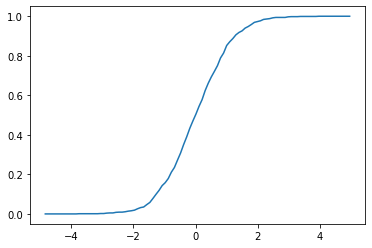

In [125]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
X = np.random.randn(1000)
F = ECDF(X)
F.plot(ax)